## EDA for Covid 19 in US

### Importing necessory libraries for data analysis

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data from two csv files

In [64]:
data=pd.read_csv("C:/Users/METRO/Downloads/Data_Analyst_Assignment/Qure.ai Data Analyst Assignment Files New (1)/Qure.ai Data Analyst Assignment Files/confirmed-covid-19-deaths-in-us-by-state-and-county copy.csv")
data.head()

,Unnamed: 0,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry
0,0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600660 entries, 0 to 600659
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   600660 non-null  int64  
 1   county_fips  600660 non-null  int64  
 2   county_name  600660 non-null  object 
 3   state_name   600660 non-null  object 
 4   state_fips   600660 non-null  int64  
 5   date         600660 non-null  object 
 6   deaths       600660 non-null  int64  
 7   lat          590696 non-null  float64
 8   long         590696 non-null  float64
 9   geometry     590696 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 45.8+ MB


In [66]:
data.shape

(600660, 10)

In [67]:
data_copy=data.copy()
data_copy.head()

,Unnamed: 0,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry
0,0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN


### Checking for null values

In [68]:
data_copy.isna().sum()

Unnamed: 0        0
county_fips       0
county_name       0
state_name        0
state_fips        0
date              0
deaths            0
lat            9964
long           9964
geometry       9964
dtype: int64

### remove null values

In [69]:
data_copy.dropna(inplace=True)

In [70]:
data_copy.isna().sum()

Unnamed: 0     0
county_fips    0
county_name    0
state_name     0
state_fips     0
date           0
deaths         0
lat            0
long           0
geometry       0
dtype: int64

### Dropping unnecessory column

In [71]:
data_copy.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [72]:
data_copy.head()

,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry
188,1001,Autauga County,AL,1,2020-01-22,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745)
189,1001,Autauga County,AL,1,2020-01-23,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745)
190,1001,Autauga County,AL,1,2020-01-24,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745)
191,1001,Autauga County,AL,1,2020-01-25,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745)
192,1001,Autauga County,AL,1,2020-01-26,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745)


### Checking for duplicate values

In [73]:
data_copy.duplicated().sum()

0

In [74]:
data_copy.shape

(590696, 9)

### Performing Data tranformation if we data according to days and months

In [75]:
data_copy['year']=pd.DatetimeIndex(data_copy['date']).year
data_copy['month']=pd.DatetimeIndex(data_copy['date']).month
data_copy['day']=pd.DatetimeIndex(data_copy['date']).day

In [76]:
data_copy.head()

,county_fips,county_name,state_name,state_fips,date,deaths,lat,long,geometry,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745),2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745),2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745),2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745),2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,32.539527,-86.644082,POINT (-86.64408227 32.53952745),2020,1,26


### droping irrelevant columns

In [77]:
data_copy.drop(columns=['lat','long','geometry'],axis=1,inplace=True)

In [78]:
data_copy.head()

,county_fips,county_name,state_name,state_fips,date,deaths,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,2020,1,26


### Renaming columns

In [79]:
data_copy.rename(columns={'county_fips':'country_figures','state_fips':'state_figures'},inplace=True)

In [80]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,2020,1,26


In [81]:
data_copy.shape

(590696, 9)

In [82]:
data_copy[['country_figures','state_figures']]

,country_figures,state_figures
188,1001,1
189,1001,1
190,1001,1
191,1001,1
192,1001,1
...,...,...
600655,56045,56
600656,56045,56
600657,56045,56
600658,56045,56


In [83]:
data_copy['month'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

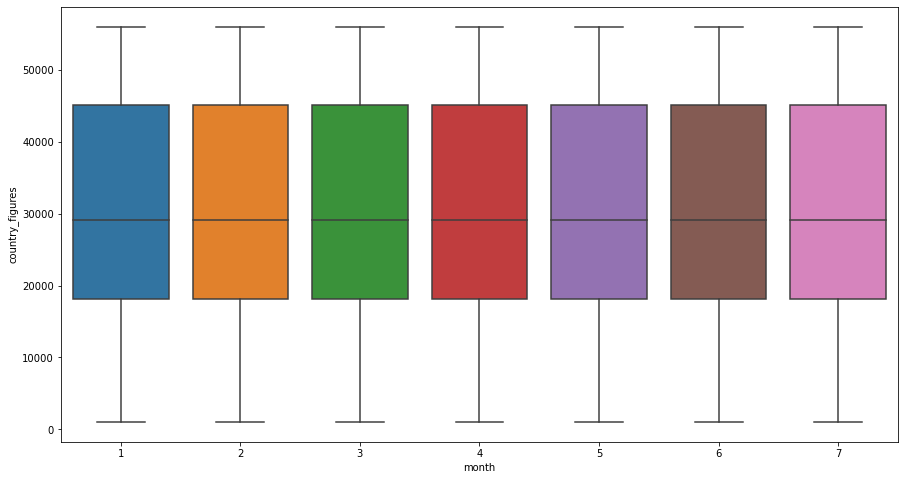

In [87]:
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=(15,8))

# Usual boxplot
ax = sns.boxplot(x='month', y='country_figures', data=data_copy)

In [88]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,2020,1,26


In [89]:
data_copy['year'].unique()

array([2020], dtype=int64)

In [92]:
data_by_state_level=pd.read_csv("C:/Users/METRO/Downloads/Data_Analyst_Assignment/Qure.ai Data Analyst Assignment Files New (1)/Qure.ai Data Analyst Assignment Files/covid-19-state-level-data copy.csv")

In [93]:
data_by_state_level.head()

,Unnamed: 0,date,state,fips,cases,deaths
0,0,2020-01-21,Washington,53,1,0
1,1,2020-01-22,Washington,53,1,0
2,2,2020-01-23,Washington,53,1,0
3,3,2020-01-24,Illinois,17,1,0
4,4,2020-01-24,Washington,53,1,0


In [94]:
data_by_state_level.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [95]:
data_by_state_level.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [96]:
data_by_state_level.rename({'fips':'figures'},axis=1,inplace=True)

In [97]:
data_by_state_level.head()

,date,state,figures,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [98]:
data_by_state_level['month']=pd.DatetimeIndex(data_by_state_level['date']).month
data_by_state_level['day']=pd.DatetimeIndex(data_by_state_level['date']).day

In [99]:
data_by_state_level.head()

,date,state,figures,cases,deaths,month,day
0,2020-01-21,Washington,53,1,0,1,21
1,2020-01-22,Washington,53,1,0,1,22
2,2020-01-23,Washington,53,1,0,1,23
3,2020-01-24,Illinois,17,1,0,1,24
4,2020-01-24,Washington,53,1,0,1,24


In [100]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,2020,1,26


In [101]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590696 entries, 188 to 600659
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   country_figures  590696 non-null  int64 
 1   county_name      590696 non-null  object
 2   state_name       590696 non-null  object
 3   state_figures    590696 non-null  int64 
 4   date             590696 non-null  object
 5   deaths           590696 non-null  int64 
 6   year             590696 non-null  int64 
 7   month            590696 non-null  int64 
 8   day              590696 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 61.2+ MB


In [102]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths,year,month,day
188,1001,Autauga County,AL,1,2020-01-22,0,2020,1,22
189,1001,Autauga County,AL,1,2020-01-23,0,2020,1,23
190,1001,Autauga County,AL,1,2020-01-24,0,2020,1,24
191,1001,Autauga County,AL,1,2020-01-25,0,2020,1,25
192,1001,Autauga County,AL,1,2020-01-26,0,2020,1,26


In [103]:
data_copy.drop(columns=['year','month','day'],inplace=True,axis=1)

In [104]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths
188,1001,Autauga County,AL,1,2020-01-22,0
189,1001,Autauga County,AL,1,2020-01-23,0
190,1001,Autauga County,AL,1,2020-01-24,0
191,1001,Autauga County,AL,1,2020-01-25,0
192,1001,Autauga County,AL,1,2020-01-26,0


In [105]:
data_by_state_level.head()

,date,state,figures,cases,deaths,month,day
0,2020-01-21,Washington,53,1,0,1,21
1,2020-01-22,Washington,53,1,0,1,22
2,2020-01-23,Washington,53,1,0,1,23
3,2020-01-24,Illinois,17,1,0,1,24
4,2020-01-24,Washington,53,1,0,1,24


In [106]:
data_by_state_level.drop(columns=['month','day'],axis=1,inplace=True)

In [107]:
data_by_state_level.head()

,date,state,figures,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### Convert file into csv format so that we can import it into our Database

In [108]:
data_by_state_level.to_csv('deaths_in_us_by_state_level',index=False)

In [109]:
data_copy.to_csv('deaths_in_us_by_state_and_country',index=False)

In [110]:
pwd

'C:\\Users\\METRO'

In [112]:
data_copy.head()

,country_figures,county_name,state_name,state_figures,date,deaths
188,1001,Autauga County,AL,1,2020-01-22,0
189,1001,Autauga County,AL,1,2020-01-23,0
190,1001,Autauga County,AL,1,2020-01-24,0
191,1001,Autauga County,AL,1,2020-01-25,0
192,1001,Autauga County,AL,1,2020-01-26,0


## visualization using seaborn 

<AxesSubplot:xlabel='date', ylabel='deaths'>

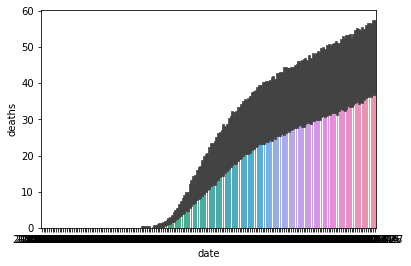

In [129]:
sns.barplot(x='date',y='deaths',data=data_copy)

<AxesSubplot:xlabel='date', ylabel='deaths'>

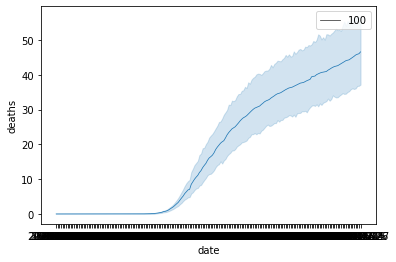

In [137]:
sns.lineplot(x='date',y='deaths',data=data_copy,size=100)

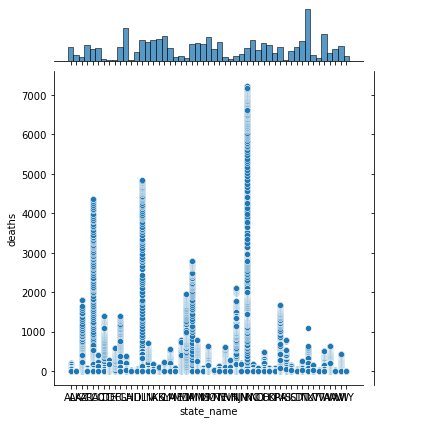

In [58]:

sns.jointplot(x='state_name',y='deaths',data=data_copy)

In [138]:
data_by_state_level.head()

,date,state,figures,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


<AxesSubplot:xlabel='state', ylabel='figures'>

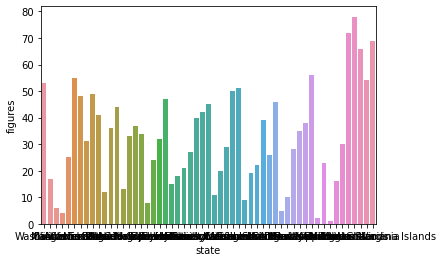

In [139]:
sns.barplot(x='state',y='figures',data=data_by_state_level).set_xticklabels(sns.barplot(data_by_state_level['state']).get_xticklabels(),
rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(14,15)
plt.title("State wise count of covid cases")
plt.show()

C:\Users\METRO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


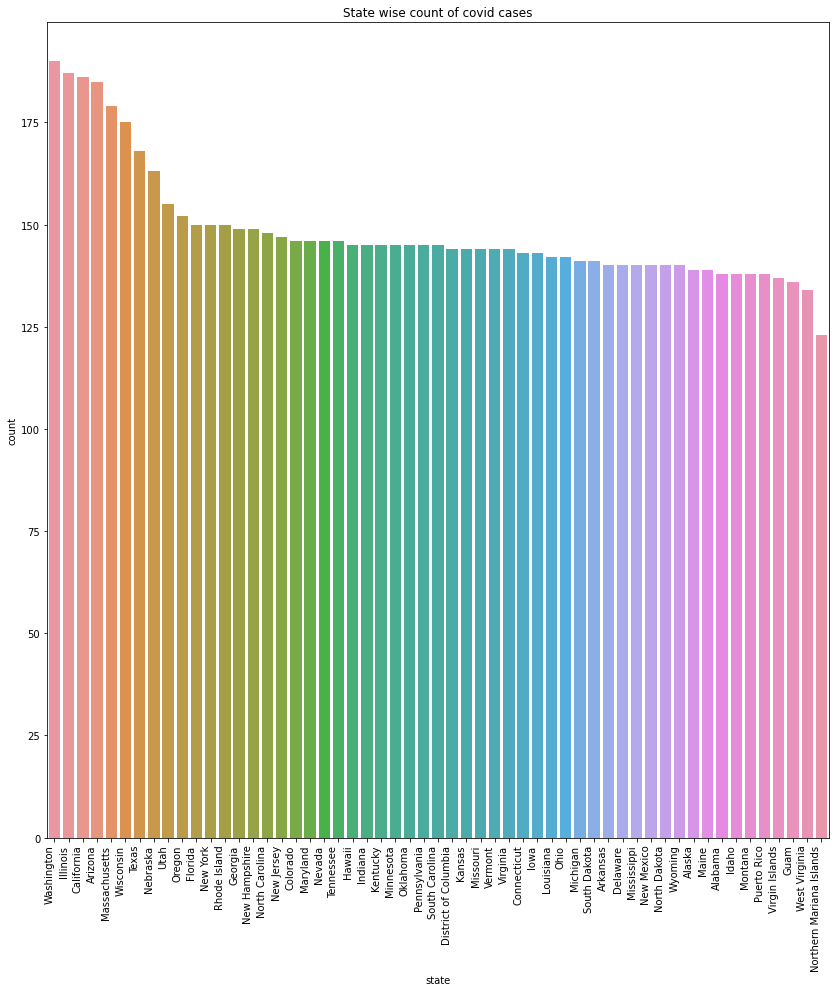

In [150]:
sns.barplot(x='state',y='figures',data=data_by_state_level).set_xticklabels(sns.countplot(data_by_state_level['state']).get_xticklabels(),
rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(14,15)
plt.title("State wise count of covid cases")
plt.show()

## Correletion between columns

In [151]:
data_by_state_level.corr()

,figures,cases,deaths
figures,1.000000,-0.098263,-0.055707
cases,-0.098263,1.000000,0.869076
deaths,-0.055707,0.869076,1.000000


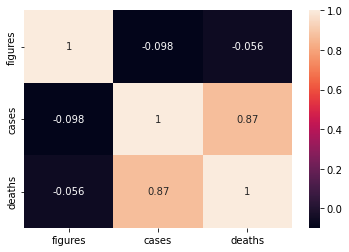

In [153]:
data_by_state=sns.heatmap(data_by_state_level.corr(),annot=True)

In [154]:
data_copy.corr()

,country_figures,state_figures,deaths
country_figures,1.000000,0.999975,-0.010368
state_figures,0.999975,1.000000,-0.010107
deaths,-0.010368,-0.010107,1.000000


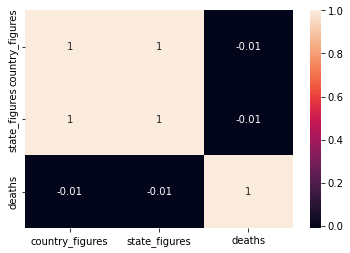

In [155]:
data_by_state_and_country=sns.heatmap(data_copy.corr(),annot=True)